# Battle of Neighbourhoods - Should more public toilets be opened in Minsk?
### 1. Introduction
### It should be noted that Minsk is situated in a country that is still developing so not all public venues (like cafes or restaurants) have toilets for customers. Not customers are usually not allowed to use toilet of a venue. At the same time for someone who is already inside of the city and not in the place with a toilet finding one can become a problem. 

### For most people, the normal number of times to urinate per day is between 6 – 7 in a 24 hour period.  When no public toilets are available it is leading to people performing unethical stuff on the streets while feeling the pressure to use washroom.

### 2. Business Problem
### A research to evaluate the availability of public toilets in Minsk and its districts could be carried out to figure out whether its number is sufficient in comparison with the number of venues that people are using from time to time or on everyday basis. This guide is based on the information about public toilets and a review of venues in Minsk.

### Consider location:
### Map out locations of existing public toilets and identify opportunities for installation of new toilet stations
### Research indicates that if public toilets are not available people are more likely to behave unethically

### 3. Data
### The data for this project has been retrieved and processed through multiple sources, giving careful considerations to the accuracy of the methods used. 

### 3.1 Public toilets in Minsk data
### The data on public toilets can be extracted out by downloading from https://opendata.by/node/441. This downloaded data is then read through panda dataframe.

### 3.2 Geocoding
### The latitude and longitude of Minsk are retrieved using Google Maps Geocoding API. The geometric location values are then stored into the intial dataframe.

### 3.3 Venue Data
### From the location data obtained after Web Scraping and Geocoding, the venue data is found out by passing in the required parameters to the FourSquare API, and creating another DataFrame to contain all the venue details along with the respective neighbourhoods.

### 4. Target audience
### This project would be interesting for people that travel around the city a lot (as a guide to public toilet locations), to government as a suggestion on the shortage of public toilets available and for businesses viewing it as a nice startup. 

### 5. Data processing, analysis
### From the map of Minsk where labels are made to point out free public toilets we can make the first observation about the limited number of toilets in general as well as abcense of toilets in some areas.
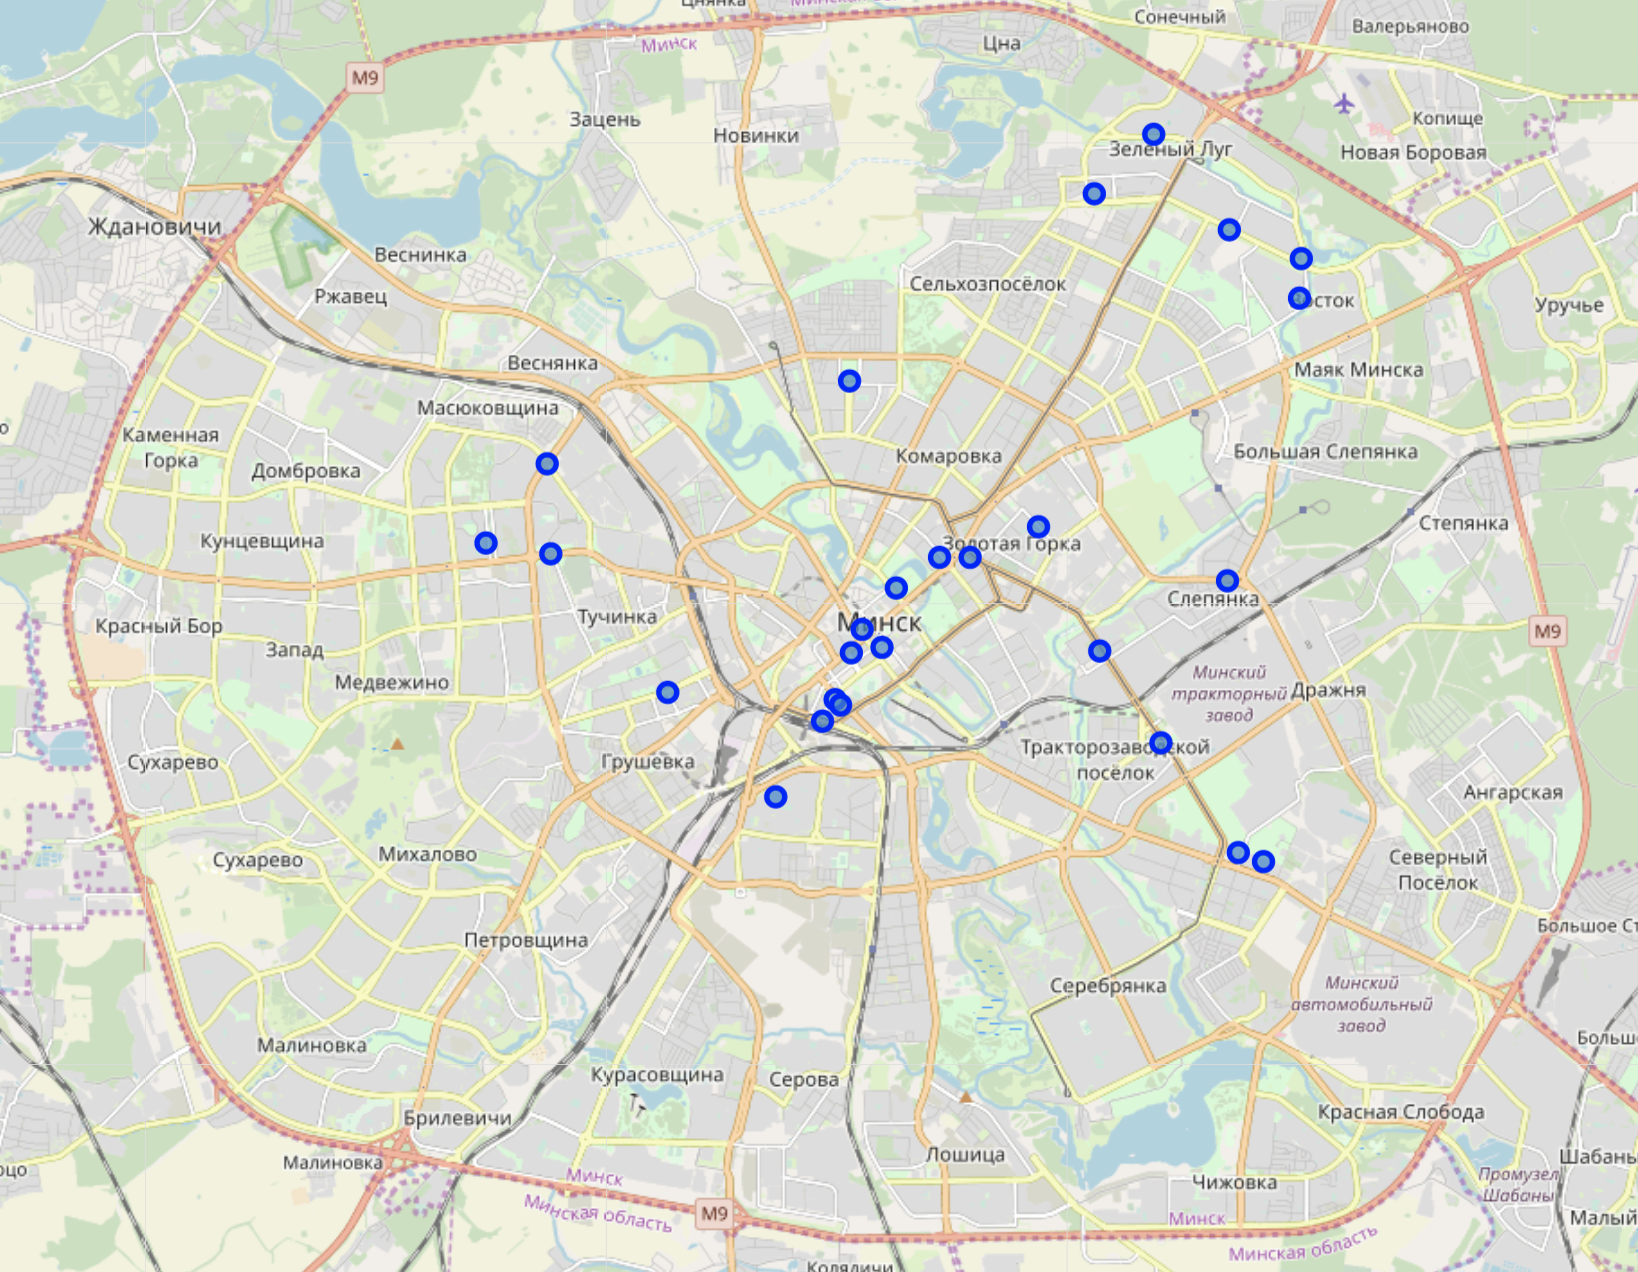
### Moreover, the total number of public toilets is 25. 
### Here it should be stated that population of Minsk is 1.975 million and with only 25 toilets available across the city going to the washroom when necessary might become an issue.

## After examining the number of unique venues in one of the districts (which total 143) it becomes clear that the city has a shortage of public toilets.

## 6. Results: 
## Free public toilets in Minsk are situated unevenly leaving some areas with little or no public toilets. At the same time it should be also noted that the number of public toilets is very low, which explains why so many unethical acts occur.
## During our observation of the district "Zavodskoy" we figured out that it contained 143 unique venue categories (meaning many more venues!) but had only 1 public toilet. Menwhile top10 places include flower shops and fish markets and these are places that have no washrooms available for publicother venues had own washrooms available but we can conclude that it is a good idea to open more public toilets as they will be in demand.




Please kindly note that language used in Minsk is Russian so csv and venues returned might be stated in the Russian language. 






importing libraries

In [40]:
import pandas as pd

import requests

getting data on public toilets 

In [41]:
! pip install xlrd

In [42]:
df=pd.read_csv('https://opendata.by/sites/default/files/resources/public_toilets_minsk.csv')
df.head()

district                                 address   latitude  longitude  \
0   Заводской          Беларусь, Минск, Жилуновича, 4  53.876513  27.630334   
1   Ленинский      Беларусь, Минск, Комсомольская, 25  53.898881  27.556521   
2   Ленинский           Беларусь, Минск, К. Маркса, 7  53.899560  27.562211   
3   Ленинский  Беларусь, Минск, Партизанский пр-т, 19  53.875347  27.635056   
4  Московский              Беларусь, Минск, Коржа, 11  53.894464  27.521304   

                            property  propertyType  owner  openHours  \
0                 Универмаг Беларусь           NaN    NaN        NaN   
1                        Спрашивайте           NaN    NaN        NaN   
2                  За зданием театра           NaN    NaN        NaN   
3                        Спрашивайте           NaN    NaN        NaN   
4  На перекрестке с ул. К. Либкнехта           NaN    NaN        NaN   

       charge  standalone  wheelchair  staffed     updated  
0  бесплатный         NaN         NaN      NaN  01/01/2012  
1  бесплатный         NaN         NaN      NaN  02/01/2012  
2  бесплатный         NaN         NaN      NaN  03/01/2012  
3  бесплатный         NaN         NaN      NaN  04/01/2012  
4  бесплатный         NaN         NaN      NaN  05/01/2012

leaving only necessary data

In [43]:
df2=df[['district', 'latitude', 'longitude']]
df2

district   latitude  longitude
0      Заводской  53.876513  27.630334
1      Ленинский  53.898881  27.556521
2      Ленинский  53.899560  27.562211
3      Ленинский  53.875347  27.635056
4     Московский  53.894464  27.521304
5    Октябрьский  53.891221  27.551027
6    Октябрьский  53.882610  27.542097
7    Октябрьский  53.893615  27.553229
8    Октябрьский  53.893089  27.554243
9   Партизанский  53.907059  27.628268
10  Партизанский  53.899064  27.603745
11  Партизанский  53.888822  27.615553
12  Партизанский  53.909672  27.578998
13  Первомайский  53.946482  27.628598
14  Первомайский  53.943167  27.642259
15  Первомайский  53.938787  27.642001
16     Советский  53.957174  27.614280
17     Советский  53.950376  27.602793
18     Советский  53.913035  27.592232
19   Центральный  53.929412  27.556176
20   Центральный  53.909636  27.573320
21   Центральный  53.906098  27.565109
22   Центральный  53.901475  27.558490
23   Фрунзенский  53.909963  27.499133
24   Фрунзенский  53.911274  27.486923
25   Фрунзенский  53.920064  27.498591

plotting a map

In [91]:
!pip install geocoder

In [92]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [93]:
address = 'Minsk'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Minsk are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Minsk are 53.902334, 27.5618791.


In [94]:
# create map of Minsk using latitude and longitude values
map_minsk = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district in zip(df2['latitude'], df2['longitude'], df2['district']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_minsk) 
    
map_minsk

In [51]:

CLIENT_ID = 'HSRA2ORIAXXWVRZCWUIYIRWHHDMKX1KLAKUA1YMCHOQKIBZ1' # your Foursquare ID
CLIENT_SECRET = '54AZVKWKMF4ULFAMXDSHCBGULC0X1MX5R5MGLHW0QXEMKJTG' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

In [54]:
df2.loc[0, 'district']

'Заводской'

In [56]:
neighborhood_latitude = df2.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df2.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df2.loc[0, 'district'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Заводской are 53.8765128, 27.6303336.


In [62]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 400 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HSRA2ORIAXXWVRZCWUIYIRWHHDMKX1KLAKUA1YMCHOQKIBZ1&client_secret=54AZVKWKMF4ULFAMXDSHCBGULC0X1MX5R5MGLHW0QXEMKJTG&v=20180604&ll=53.8765128,27.6303336&radius=400&limit=100'

In [72]:
def getNearbyVenues(names, latitudes, longitudes, radius=400, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:
minsk_venues = getNearbyVenues(names=df2['district'],
                                   latitudes=df2['latitude'],
                                   longitudes=df2['longitude']
                                  )

In [76]:
Minsk_venues = getNearbyVenues(df2.district,
                                 df2.latitude,
                                 df2.longitude)

In [77]:
print(Minsk_venues)

     Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Заводской              53.876513               27.630334   
1       Заводской              53.876513               27.630334   
2       Заводской              53.876513               27.630334   
3       Заводской              53.876513               27.630334   
4       Заводской              53.876513               27.630334   
5       Заводской              53.876513               27.630334   
6       Заводской              53.876513               27.630334   
7       Заводской              53.876513               27.630334   
8       Заводской              53.876513               27.630334   
9       Заводской              53.876513               27.630334   
10      Заводской              53.876513               27.630334   
11      Заводской              53.876513               27.630334   
12      Заводской              53.876513               27.630334   
13      Заводской              53.876513        

In [79]:
Minsk_venues.groupby('Venue').count()

Neighborhood  \
Venue                                                              
1067 Piva & Ezha                                               3   
1886 Bonomi                                                    1   
26                                                             3   
2Step                                                          1   
A1                                                             3   
AffectaSport                                                   1   
BRASSERIE 22                                                   3   
Basta                                                          2   
BeerHol’d                                                      2   
BierKeller                                                     1   
Bistro de Luxe                                                 1   
Bubble Maker                                                   1   
Butler                                                         1   
Café de Paris                                                  3   
Calliope                                                       4   
Capolavori                                                     2   
Carl's Jr.                                                     2   
Casino Royal                                                   1   
Chop-Chop                                                      2   
Cimes                                                          3   
City Room                                                      1   
Clever Irish Pub                                               1   
Cocktail Bar Duck                                              1   
Coffee & Кава                                                  2   
Coffee Embassy                                                 2   
Coffee Joy                                                     1   
CoffeeBerry                                                    2   
Colin's                                                        3   
Coven                                                          1   
Crowne Plaza Minsk                                             3   
Cubi Rubi                                                      1   
Danova Dance School                                            1   
DeFacto                                                        3   
Decanter                                                       2   
Domino's Pizza                                                 1   
Don Coffe'On                                                   1   
Doner King                                                     5   
Ecolines "Minsk-Warsaw"                                        1   
El Cartel Barbershop                                           1   
Embargo                                                        1   
Ermenegildo Zegna                                              1   
Executive lounge                                               2   
Fashion Club Летняя Терраса                                    1   
Feelini                                                        1   
Filtr                                                          2   
Fleur De Lys                                                   1   
Food court / Фудкорт                                           1   
Freedom Square (Плошча Свабоды)                                1   
GURU Coffee Club                                               4   
Golden Café 116                                                1   
Golden Coffee (Golden Coffee Express)                          3   
Grand Café                                                     2   
Gurman's                                                       1   
High Five Studio                                               1   
Honky Tonk                                                     1   
HookahDeli                                                     1   
Hugo BOSS                                                      1   
ID Bar                                  

In [81]:
print('There are {} unique categories.'.format(len(Minsk_venues['Venue Category'].unique())))

There are 143 unique categories.


In [83]:
# one hot encoding
Minsk_onehot = pd.get_dummies(Minsk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Minsk_onehot['Venue'] = Minsk_venues['Venue'] 

# move neighborhood column to the first column
fixed_columns = [Minsk_onehot.columns[-1]] + list(Minsk_onehot.columns[:-1])
Minsk_onehot = Minsk_onehot[fixed_columns]

Minsk_onehot.head()

Venue  American Restaurant  Arcade  Art Gallery  Art Museum  \
0          Vegetus.by                    0       0            0           0   
1         Terra Pizza                    0       0            0           0   
2  Гостиница «Турист»                    0       0            0           0   
3              Nevada                    0       0            0           0   
4                 МТС                    0       0            0           0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  Bakery  Bar  \
0                 0                   0                      0       0    0   
1                 0                   0                      0       0    0   
2                 0                   0                      0       0    0   
3                 0                   0                      0       0    0   
4                 0                   0                      0       0    0   

   Basketball Court  Bathing Area  Beer Bar  Belarusian Restaurant  Bistro  \
0                 0             0         0                      0       0   
1                 0             0         0                      0       0   
2                 0             0         0                      0       0   
3                 0             0         0                      0       0   
4                 0             0         0                      0       0   

   Bookstore  Boutique  Boxing Gym  Breakfast Spot  Bridal Shop  \
0          0         0           0               0            0   
1          0         0           0               0            0   
2          0         0           0               0            0   
3          0         0           0               0            0   
4          0         0           0               0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Bus Line  Bus Stop  Café  \
0                0       0             0         0         0     0   
1                0       0             0         0         0     0   
2                0       0             0         0         0     0   
3                0       0             0         0         0     0   
4                0       0             0         0         0     0   

   Camera Store  Candy Store  Casino  Caucasian Restaurant  Circus  City Hall  \
0             0            0       0                     0       0          0   
1             0            0       0                     0       0          0   
2             0            0       0                     0       0          0   
3             0            0       1                     0       0          0   
4             0            0       0                     0       0          0   

   Clothing Store  Cocktail Bar  Coffee Shop  Concert Hall  Convenience Store  \
0               0             0            0             0                  1   
1               0             0            0             0                  0   
2               0             0            0             0                  0   
3               0             0            0             0                  0   
4               0             0            0             0                  0   

   Cosmetics Shop  Dance Studio  Deli / Bodega  Department Store  \
0               0             0              0                 0   
1               0             0              0                 0   
2               0             0              0                 0   
3               0             0              0                 0   
4               0             0              0                 0   

   Dessert Shop  Doner Restaurant  Eastern European Restaurant  \
0             0                 0                            0   
1             0                 0                            0   
2             0                 0                            0   
3             0                 0                            0   
4             0                 0                           

In [84]:
Minsk_grouped = Minsk_onehot.groupby('Venue').mean().reset_index()
Minsk_grouped

Venue  American Restaurant  \
0                                     1067 Piva & Ezha                  0.0   
1                                          1886 Bonomi                  0.0   
2                                                   26                  0.0   
3                                                2Step                  0.0   
4                                                   A1                  0.0   
5                                         AffectaSport                  0.0   
6                                         BRASSERIE 22                  0.0   
7                                                Basta                  0.0   
8                                            BeerHol’d                  0.0   
9                                           BierKeller                  0.0   
10                                      Bistro de Luxe                  0.0   
11                                        Bubble Maker                  0.0   
12                                              Butler                  0.0   
13                                       Café de Paris                  0.0   
14                                            Calliope                  0.0   
15                                          Capolavori                  0.0   
16                                          Carl's Jr.                  0.0   
17                                        Casino Royal                  0.0   
18                                           Chop-Chop                  0.0   
19                                               Cimes                  0.0   
20                                           City Room                  0.0   
21                                    Clever Irish Pub                  0.0   
22                                   Cocktail Bar Duck                  0.0   
23                                       Coffee & Кава                  0.0   
24                                      Coffee Embassy                  0.0   
25                                          Coffee Joy                  0.0   
26                                         CoffeeBerry                  0.0   
27                                             Colin's                  0.0   
28                                               Coven                  0.0   
29                                  Crowne Plaza Minsk                  0.0   
30                                           Cubi Rubi                  0.0   
31                                 Danova Dance School                  0.0   
32                                             DeFacto                  0.0   
33                                            Decanter                  0.0   
34                                      Domino's Pizza                  0.0   
35                                        Don Coffe'On                  0.0   
36                                          Doner King                  0.0   
37                             Ecolines "Minsk-Warsaw"                  0.0   
38                                El Cartel Barbershop                  0.0   
39                                             Embargo                  0.0   
40                                   Ermenegildo Zegna                  0.0   
41                                    Executive lounge                  0.0   
42                         Fashion Club Летняя Терраса                  0.0   
43                                             Feelini                  0.0   
44                                               Filtr                  0.0   
45                                        Fleur De Lys                  0.0   
46                                Food court / Фудкорт                  0.0   
47                     Freedom Square (Плошча Свабоды)                  0.0   
48                                    GURU Coffee Club                  0.0   
49                                     Golden Café 116                  0.0   
50               Gol

In [85]:
num_top_venues = 5

for hood in Minsk_grouped['Venue']:
    print("----"+hood+"----")
    temp = Minsk_grouped[Minsk_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1067 Piva & Ezha----
               venue  freq
0          Gastropub   1.0
1             Office   0.0
2       Optical Shop   0.0
3  Other Repair Shop   0.0
4  Outdoor Sculpture   0.0


----1886 Bonomi----
                 venue  freq
0          Coffee Shop   1.0
1  American Restaurant   0.0
2            Pet Store   0.0
3    Other Repair Shop   0.0
4    Outdoor Sculpture   0.0


----26----
                 venue  freq
0          Coffee Shop   1.0
1  American Restaurant   0.0
2            Pet Store   0.0
3    Other Repair Shop   0.0
4    Outdoor Sculpture   0.0


----2Step----
                           venue  freq
0                   Dance Studio   1.0
1             Israeli Restaurant   0.0
2              Other Repair Shop   0.0
3              Outdoor Sculpture   0.0
4  Paper / Office Supplies Store   0.0


----A1----
                 venue  freq
0    Mobile Phone Shop  0.67
1               Office  0.33
2  American Restaurant  0.00
3    Other Repair Shop  0.00
4    Outdoor Sculpture

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [88]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Venue'] = Minsk_grouped['Venue']

for ind in np.arange(Minsk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Minsk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Venue 1st Most Common Venue 2nd Most Common Venue  \
0  1067 Piva & Ezha             Gastropub           Yoga Studio   
1       1886 Bonomi           Coffee Shop           Yoga Studio   
2                26           Coffee Shop           Yoga Studio   
3             2Step          Dance Studio           Yoga Studio   
4                A1     Mobile Phone Shop                Office   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     French Restaurant            Food Court     Food & Drink Shop   
1           Event Space            Food Court     Food & Drink Shop   
2           Event Space            Food Court     Food & Drink Shop   
3           Event Space            Food Court     Food & Drink Shop   
4              Fountain            Food Court     Food & Drink Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Flower Shop           Fish Market  Fast Food Restaurant   
1           Flower Shop           Fish Market  Fast Food Restaurant   
2           Flower Shop           Fish Market  Fast Food Restaurant   
3           Flower Shop           Fish Market  Fast Food Restaurant   
4           Flower Shop           Fish Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0        Farmers Market            Event Space  
1        Farmers Market      Electronics Store  
2        Farmers Market      Electronics Store  
3        Farmers Market      Electronics Store  
4        Farmers Market            Yoga Studio

In [89]:
# set number of clusters
kclusters = 5

Minsk_grouped_clustering = Minsk_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Minsk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Minsk_merged = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Minsk_merged = Minsk_merged.join(neighborhoods_venues_sorted.set_index('Venue'), on='Venue')

Minsk_merged.head() # check the last columns!

# **Report:**
## It is a human nature to be using WC from time to time. Once people are staying at home or in the office at work this is not a problem. It besomes a problem fro those who are constantly on the move and cannot afford going into restaurants and paying for food/beverage (to become a client) so as to use a washroom. This project would be interesting for people that travel around the city a lot (as a guide to public toilet locations), to government as a suggestion on the shortage of public toilets available and for businesses viewing it as a nice startup. 

## Data can be used to show how many free public toilets are there in the city and in a certain district of a city in comparison with the number of venues closeby. To answer this question data on public toilets will be needed. Such data is available on https://opendata.by/node/441 so that is where I will take it from (though it is not much up to date).

## As for the methodology, since the problem to be addressed is defined, the appropriate analytic approach for the problem can be selected in the context of the business requirements.  Statistical analysis applies to problems that require counts. Data required is data on public toilets as well as data on venues in the area that is being examined. After data is gained (as we are using ready data we cannot really influence the process and will work with what is available) and prepared for usage (unnecessary or Nan values dropped) we can start.

## Results: 
## First observation that is made is that free public toilets in Minsk are situated unevenly leaving some areas with little or no public toilets. At the same time it should be also noted that the number of public toilets is very low, which explains why so many unethical acts occur.
## During our observation of the district "Zavodskoy" we figured out that it contained 143 unique venue categories (meaning many more venues!) but had only 1 public toilet. Menwhile top10 places include flower shops and fish markets and these are places that have no washrooms available for publicother venues had own washrooms available but we can conclude that it is a good idea to open more public toilets as they will be in demand.
